In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


# General

In [2]:
def get_prime_list(x_min, x_max):

    # originally tried to get python bindings from https://github.com/shlomif/primesieve-python
    # didn't work with conda or pip, I think it's just old with limited version compatibilities
    # this method with a file is probably just as good

    # from https://github.com/kimwalisch/primesieve
    os.system(f"primesieve {x_min} {x_max} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    return np.array([int(s) for s in prime_strs])


# Prime Counts

In [3]:
def pi(x):
    os.system(f"primesieve {x} -c > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_str = f.read().splitlines()[-1].split()[-1]

    return int(prime_str)

def pis(x):

    if x == 0:
        return [0]

    os.system(f"primesieve {x} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    primes = [int(s) for s in prime_strs]

    pis = np.zeros(x, dtype=int)
    for p in primes:
        pis[p-1:] += 1

    return pis

def pi_approx_x_over_logx(x):
    return x / np.log(x)

def pis_approx_x_over_logx(x):
    return np.arange(1, x+1) / np.log(np.arange(1, x+1))

from mpmath import li
def pi_approx_Lix(x):
    return li(x, offset=True)

def pis_approx_Lix(x):
    return np.array([li(i, offset=True) for i in range(1, x+1)])

/tmp/ipykernel_519689/1996118002.py:31: RuntimeWarning: divide by zero encountered in divide
  return np.arange(1, x+1) / np.log(np.arange(1, x+1))


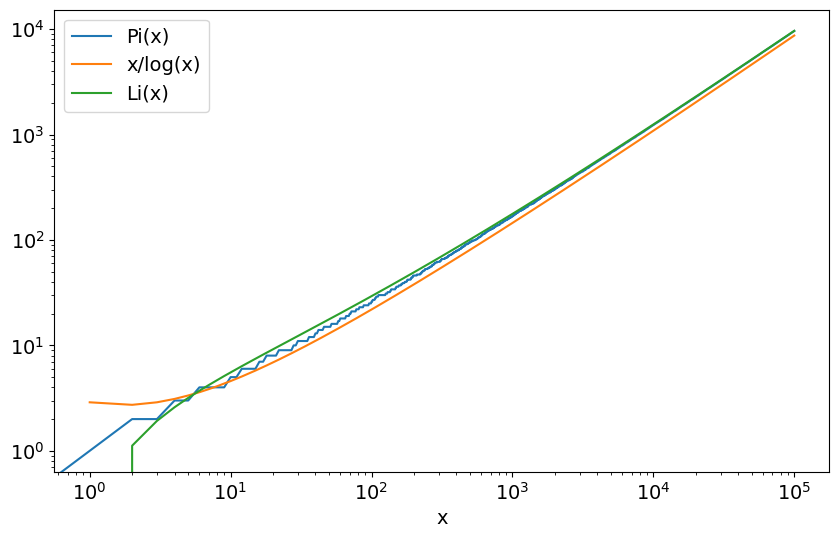

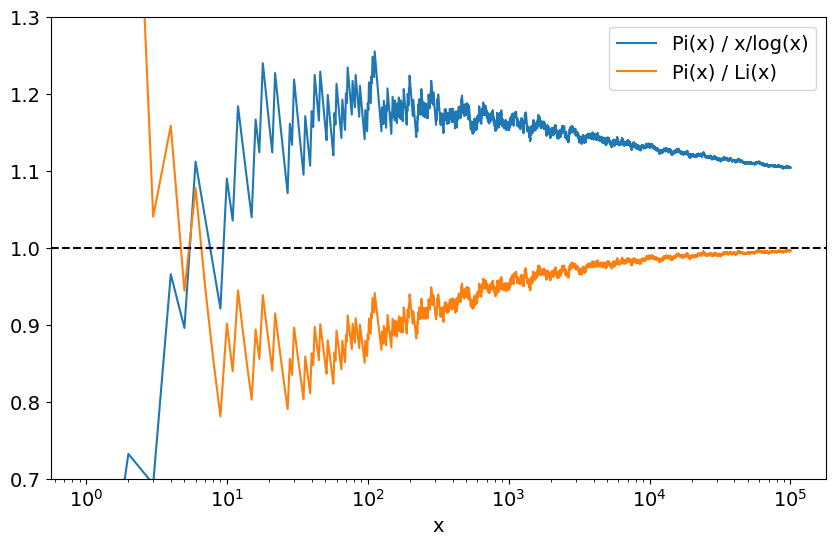

/home/lee/miniconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: RuntimeWarning: invalid value encountered in cast
  return np.asarray(x, float)


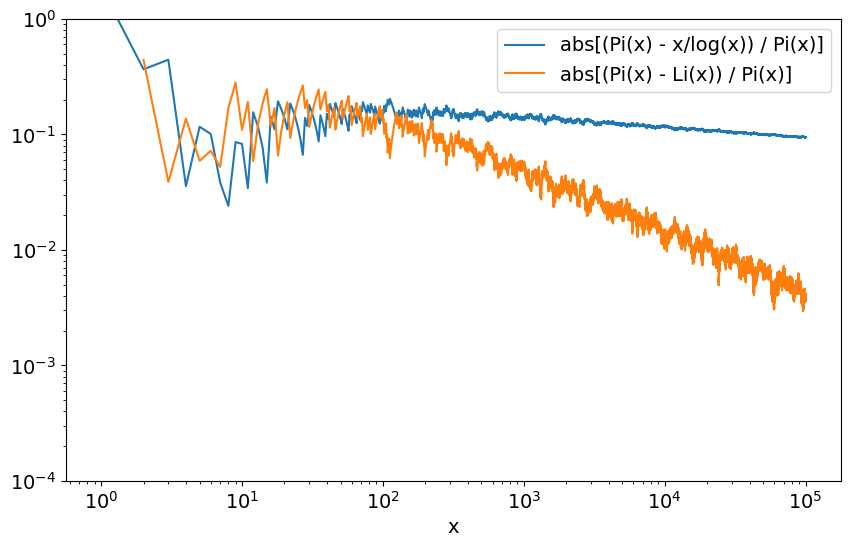

In [4]:
max_num = int(1e5)

plt.rcParams.update({'font.size': 14})

curr_pis = pis(max_num)
curr_pis_approx_x_over_logx = pis_approx_x_over_logx(max_num)
curr_pis_approx_Lix = pis_approx_Lix(max_num)

plt.figure(figsize=(10, 6))
plt.plot(curr_pis, label="Pi(x)")
plt.plot(curr_pis_approx_x_over_logx, label="x/log(x)")
plt.plot(curr_pis_approx_Lix, label="Li(x)")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_pis_approx_x_over_logx = np.where(curr_pis_approx_x_over_logx == 0, np.nan, curr_pis_approx_x_over_logx)
safer_curr_pis_approx_Lix = np.where(curr_pis_approx_Lix == 0, np.nan, curr_pis_approx_Lix)
safer_curr_pis = np.where(curr_pis == 0, np.nan, curr_pis)

curr_pis_approx_x_over_logx_ratio = curr_pis / safer_curr_pis_approx_x_over_logx
curr_pis_approx_Lix_ratio = curr_pis / safer_curr_pis_approx_Lix

plt.figure(figsize=(10, 6))
plt.plot(curr_pis_approx_x_over_logx_ratio, label="Pi(x) / x/log(x)")
plt.plot(curr_pis_approx_Lix_ratio, label="Pi(x) / Li(x)")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.ylim(0.7, 1.3)
plt.show()

ratio_error_x_over_logx = np.abs((curr_pis - safer_curr_pis_approx_x_over_logx) / safer_curr_pis)
ratio_error_Lix = np.abs((curr_pis - safer_curr_pis_approx_Lix) / safer_curr_pis)

plt.figure(figsize=(10, 6))
plt.plot(ratio_error_x_over_logx, label="abs[(Pi(x) - x/log(x)) / Pi(x)]")
plt.plot(ratio_error_Lix, label="abs[(Pi(x) - Li(x)) / Pi(x)]")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-4, 1)
plt.show()


# Nth Prime

In [5]:
def nth_prime(n):

    # 1-indexed, 1st prime is 2, 2nd is 3, etc.

    os.system(f"primesieve -n {n} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_str = f.read().splitlines()[0]

    return int(prime_str)

def nth_prime_list(n):

    largest_prime = nth_prime(n)
    
    os.system(f"primesieve {largest_prime} -p > generated_primes.txt")

    with open("generated_primes.txt", "r") as f:
        prime_strs = f.read().splitlines()

    return np.array([int(s) for s in prime_strs])


def nth_prime_approx_nlogn(n):
    return int(n * np.log(n))

def nth_prime_approx_better(n):
    # https://en.wikipedia.org/wiki/Prime_number_theorem#Approximations_for_the_nth_prime_number

    val = n * (
            np.log(n)
          + np.log(np.log(n)) - 1
          + (np.log(np.log(n)) - 2) / np.log(n)
          - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)
        )
    
    if np.isfinite(val) == False:
        return np.nan
    
    return int(val)


/tmp/ipykernel_519689/2022536128.py:32: RuntimeWarning: divide by zero encountered in log
  + np.log(np.log(n)) - 1
/tmp/ipykernel_519689/2022536128.py:33: RuntimeWarning: divide by zero encountered in log
  + (np.log(np.log(n)) - 2) / np.log(n)
/tmp/ipykernel_519689/2022536128.py:34: RuntimeWarning: divide by zero encountered in log
  - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)


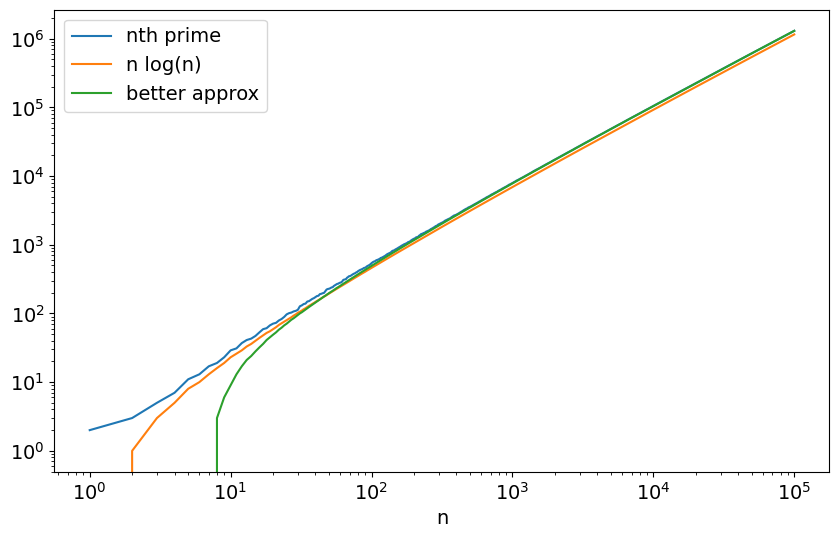

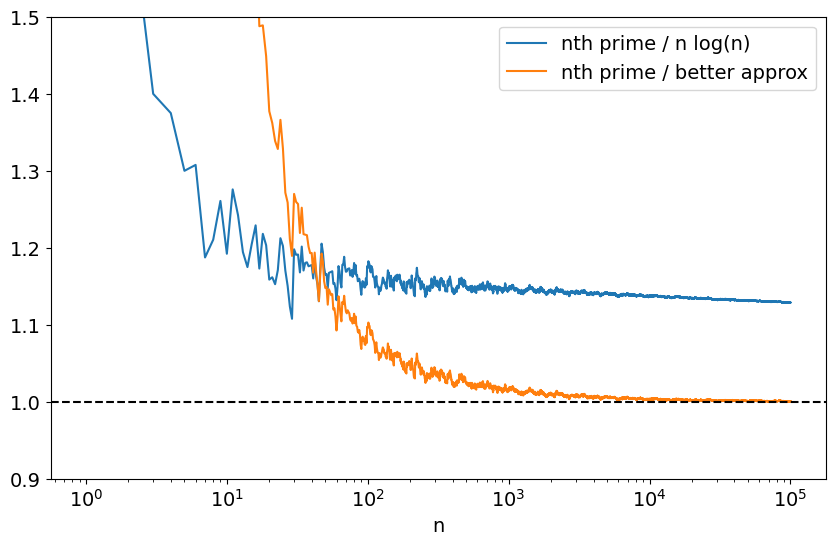

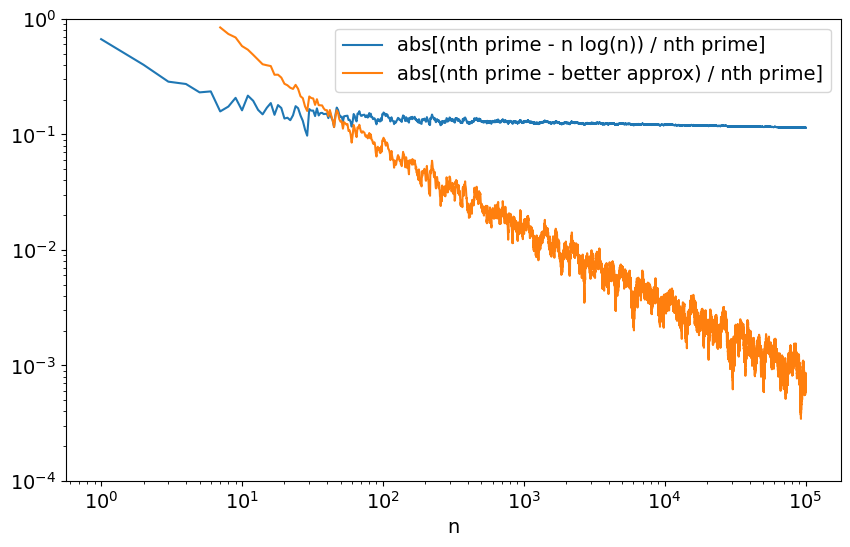

In [6]:
plt.rcParams.update({'font.size': 14})

ns = np.arange(1, max_num+1)
curr_nths = nth_prime_list(max_num)
curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

plt.figure(figsize=(10, 6))
plt.plot(ns, curr_nths, label="nth prime")
plt.plot(ns, curr_nths_approx_nlogn, label="n log(n)")
plt.plot(ns, curr_nths_approx_better, label="better approx")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.show()

safer_curr_nths_approx_nlogn = np.where(curr_nths_approx_nlogn == 0, np.nan, curr_nths_approx_nlogn)
safer_curr_nths_approx_better = np.where(curr_nths_approx_better == 0, np.nan, curr_nths_approx_better)

curr_nths_approx_nlogn_ratio = curr_nths / safer_curr_nths_approx_nlogn
curr_nths_approx_better_ratio = curr_nths / safer_curr_nths_approx_better

plt.figure(figsize=(10, 6))
plt.plot(curr_nths_approx_nlogn_ratio, label="nth prime / n log(n)")
plt.plot(curr_nths_approx_better_ratio, label="nth prime / better approx")
plt.axhline(1, color="black", linestyle="--")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.ylim(0.9, 1.5)
plt.show()

ratio_error_nlogn = np.abs((curr_nths - safer_curr_nths_approx_nlogn) / curr_nths)
ratio_error_better = np.abs((curr_nths - safer_curr_nths_approx_better) / curr_nths)

plt.figure(figsize=(10, 6))
plt.plot(ratio_error_nlogn, label="abs[(nth prime - n log(n)) / nth prime]")
plt.plot(ratio_error_better, label="abs[(nth prime - better approx) / nth prime]")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.ylim(1e-4, 1)
plt.show()


# Prime Gaps

## Nth Prime Gap

/tmp/ipykernel_519689/2022536128.py:32: RuntimeWarning: divide by zero encountered in log
  + np.log(np.log(n)) - 1
/tmp/ipykernel_519689/2022536128.py:33: RuntimeWarning: divide by zero encountered in log
  + (np.log(np.log(n)) - 2) / np.log(n)
/tmp/ipykernel_519689/2022536128.py:34: RuntimeWarning: divide by zero encountered in log
  - (np.log(np.log(n))**2 - 6 * np.log(np.log(n)) + 11) / (2*np.log(n)**2)


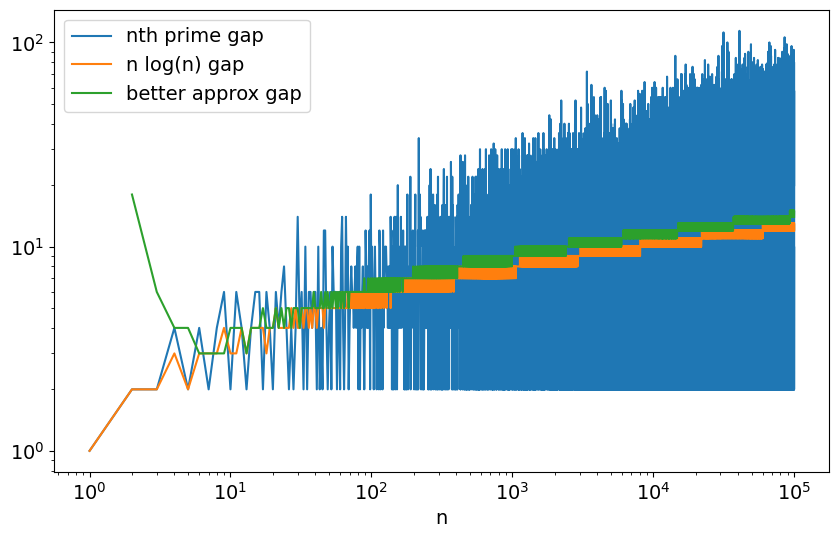

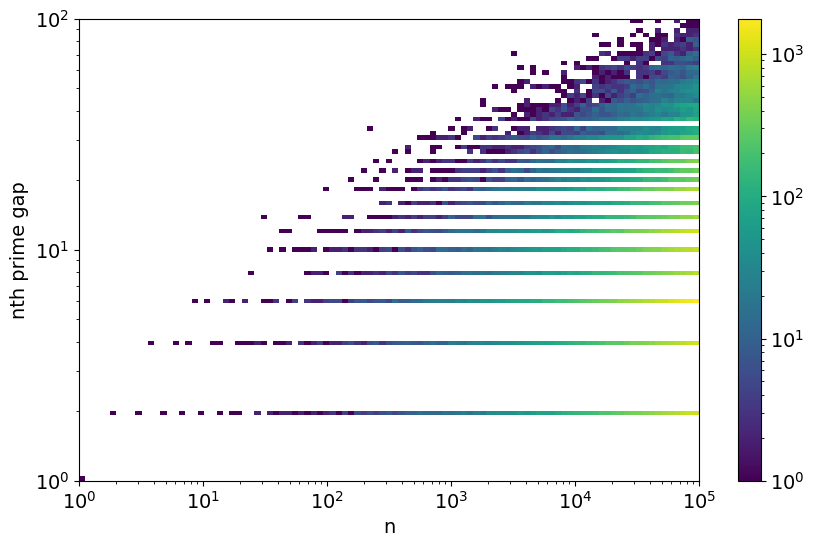

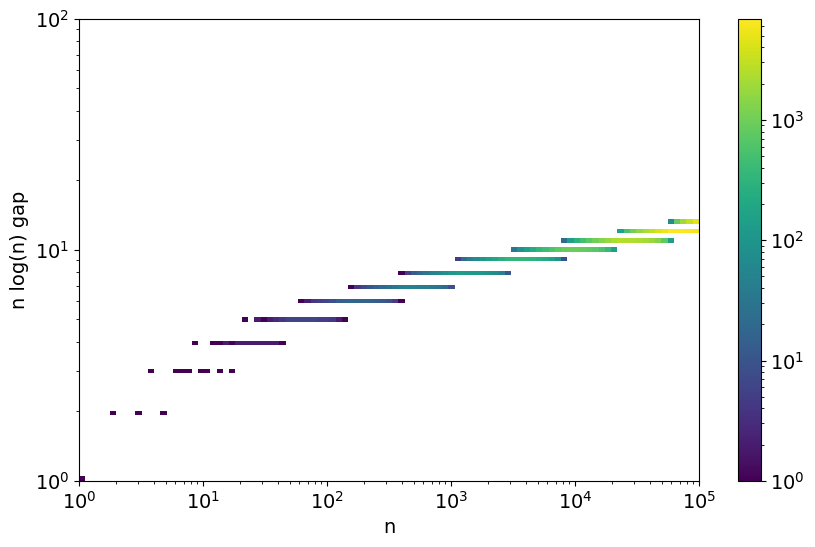

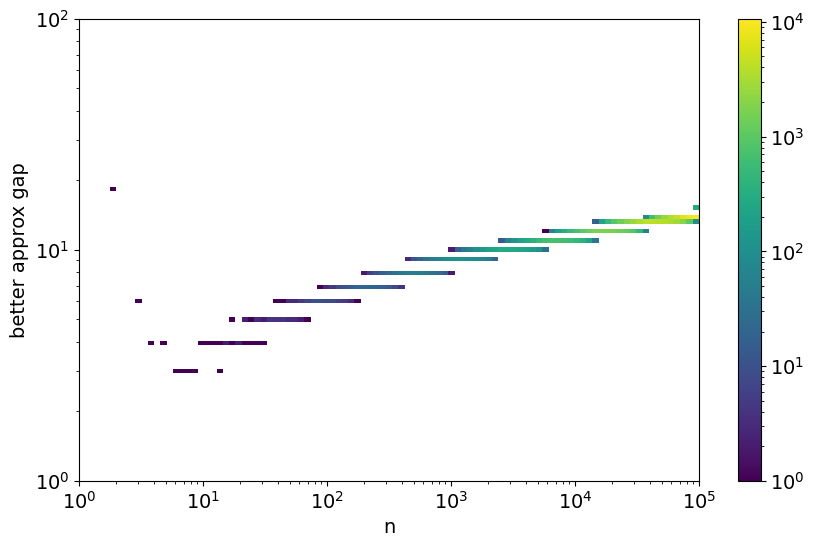

In [7]:
plt.rcParams.update({'font.size': 14})

ns = np.arange(1, max_num+1)
curr_nths = nth_prime_list(max_num)
curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

curr_ns = ns[:-1]
curr_nth_gaps = np.diff(curr_nths)
curr_nth_approx_nlogn_gaps = np.diff(curr_nths_approx_nlogn)
curr_nth_approx_better_gaps = np.diff(curr_nths_approx_better)

plt.figure(figsize=(10, 6))
plt.plot(curr_ns, curr_nth_gaps, label="nth prime gap")
plt.plot(curr_ns, curr_nth_approx_nlogn_gaps, label="n log(n) gap")
plt.plot(curr_ns, curr_nth_approx_better_gaps, label="better approx gap")
plt.legend()
plt.xlabel("n")
plt.xscale("log")
plt.yscale("log")
plt.show()

bins_n = np.logspace(0, np.log10(max_num), 100)
bins_gap = np.logspace(0, 2, 100)
bins = (bins_n, bins_gap)

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("nth prime gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_approx_nlogn_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("n log(n) gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

plt.figure(figsize=(10, 6))
plt.hist2d(curr_ns, curr_nth_approx_better_gaps, bins=bins, norm=mpl.colors.LogNorm())
plt.yscale("log")
plt.xscale("log")
plt.ylabel("better approx gap")
plt.xlabel("n")
plt.colorbar()
plt.show()

## Specific Gap Density

In [8]:
def count_k_tuples_by_k(x, k):
    # This gets the count of all k-tuples, which means for any tuple of length k, subject to an "admissibility" condition
    # https://en.wikipedia.org/wiki/Prime_k-tuple
    if k < 2:
        raise ValueError("k must be greater than or equal to 2")
    elif k > 6:
        raise ValueError("k must be less than or equal to 6")
    os.system(f"primesieve {x} -c{k} > generated_primes.txt")
    with open("generated_primes.txt", "r") as f:
        prime_str = f.read().splitlines()[-1].split()[-1]
    return int(prime_str)

def count_k_tuples(x, tup, print_tuples=False):
    max_diff = max(tup)
    primes = get_prime_list(0, x + max_diff)
    ret = 0
    for i in range(len(primes)):
        p = primes[i]
        valid = True
        for t in tup:
            if p + t not in primes:
                valid = False
                break
        if valid:
            if print_tuples: print("  valid:", end=" ")
            if print_tuples: 
                for t in tup: print(p + t, end=" ")
            if print_tuples: print("")
            ret += 1
    return ret

def get_counts_k_tuples(x, tup):
    max_diff = max(tup)
    primes = get_prime_list(0, x + max_diff)
    ret = np.zeros(x, dtype=int)
    for i in range(len(primes)):
        if i > len(primes) - max_diff:
            continue
        p = primes[i]
        valid = True
        for t in tup:
            if p + t not in primes:
                valid = False
                break
        if valid:
            ret[p-1:] += 1
    return ret


def count_twin_primes(x): return count_k_tuples(x, (0, 2)) # count_k_tuples_by_k(x, 2) should also work
def count_cousin_primes(x): return count_k_tuples(x, (0, 4))
def count_sexy_primes(x): return count_k_tuples(x, (0, 6))
def count_triplet_primes(x): return count_k_tuples(x, (0, 2, 6)) + count_k_tuples(x, (0, 4, 6)) # count_k_tuples_by_k(x, 3) should also work
def count_sexy_triplet_primes(x): return count_k_tuples(x, (0, 6, 12))
def count_quadruplet_primes(x): return count_k_tuples(x, (0, 2, 6, 8))
def count_sexy_quadruplet_primes(x): return count_k_tuples(x, (0, 6, 12, 18))
def count_quintuplet_primes(x): return count_k_tuples(x, (0, 2, 6, 8, 12)) + count_k_tuples(x, (0, 4, 6, 10, 12))
def count_sextuplet_primes(x): return count_k_tuples(x, (0, 4, 6, 10, 12, 16))

def get_counts_twin_primes(x): return get_counts_k_tuples(x, (0, 2))
def get_counts_cousin_primes(x): return get_counts_k_tuples(x, (0, 4))
def get_counts_sexy_primes(x): return get_counts_k_tuples(x, (0, 6))
def get_counts_triplet_primes(x): return get_counts_k_tuples(x, (0, 2, 6)) + get_counts_k_tuples(x, (0, 4, 6))
def get_counts_sexy_triplet_primes(x): return get_counts_k_tuples(x, (0, 6, 12))
def get_counts_quadruplet_primes(x): return get_counts_k_tuples(x, (0, 2, 6, 8))
def get_counts_sexy_quadruplet_primes(x): return get_counts_k_tuples(x, (0, 6, 12, 18))
def get_counts_quintuplet_primes(x): return get_counts_k_tuples(x, (0, 2, 6, 8, 12)) + get_counts_k_tuples(x, (0, 4, 6, 10, 12))
def get_counts_sextuplet_primes(x): return get_counts_k_tuples(x, (0, 4, 6, 10, 12, 16))


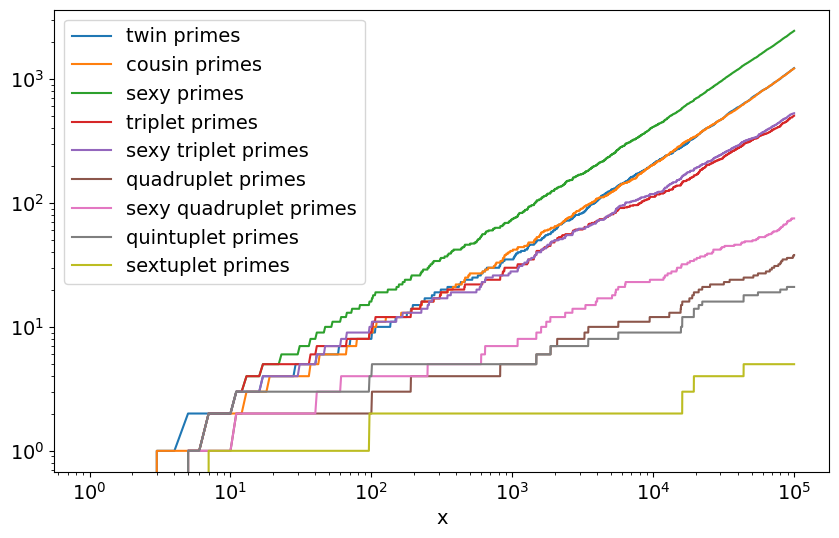

In [9]:
ns = np.arange(1, max_num+1)
curr_twin_primes = get_counts_twin_primes(max_num)
curr_cousin_primes = get_counts_cousin_primes(max_num)
curr_sexy_primes = get_counts_sexy_primes(max_num)
curr_triplet_primes = get_counts_triplet_primes(max_num)
curr_sexy_triplet_primes = get_counts_sexy_triplet_primes(max_num)
curr_quadruplet_primes = get_counts_quadruplet_primes(max_num)
curr_sexy_quadruplet_primes = get_counts_sexy_quadruplet_primes(max_num)
curr_quintuplet_primes = get_counts_quintuplet_primes(max_num)
curr_sextuplet_primes = get_counts_sextuplet_primes(max_num)

plt.figure(figsize=(10, 6))
plt.plot(ns, curr_twin_primes, label="twin primes")
plt.plot(ns, curr_cousin_primes, label="cousin primes")
plt.plot(ns, curr_sexy_primes, label="sexy primes")
plt.plot(ns, curr_triplet_primes, label="triplet primes")
plt.plot(ns, curr_sexy_triplet_primes, label="sexy triplet primes")
plt.plot(ns, curr_quadruplet_primes, label="quadruplet primes")
plt.plot(ns, curr_sexy_quadruplet_primes, label="sexy quadruplet primes")
plt.plot(ns, curr_quintuplet_primes, label="quintuplet primes")
plt.plot(ns, curr_sextuplet_primes, label="sextuplet primes")
plt.legend()
plt.xlabel("x")
plt.xscale("log")
plt.yscale("log")
plt.show()


# Digit Tests

/tmp/ipykernel_519689/2309198069.py:15: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, (last_digit_cum_counts[0] + last_digit_cum_counts[2] + last_digit_cum_counts[4] + last_digit_cum_counts[6] + last_digit_cum_counts[8] + last_digit_cum_counts[5]) / curr_pis, label=f"last digit even or 5")
/tmp/ipykernel_519689/2309198069.py:16: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[1] / curr_pis, label=f"last digit 1")
/tmp/ipykernel_519689/2309198069.py:17: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[3] / curr_pis, label=f"last digit 3")
/tmp/ipykernel_519689/2309198069.py:18: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[7] / curr_pis, label=f"last digit 7")
/tmp/ipykernel_519689/2309198069.py:19: RuntimeWarning: invalid value encountered in divide
  plt.plot(xs, last_digit_cum_counts[9] / curr_pis, label=f"last digit 9")


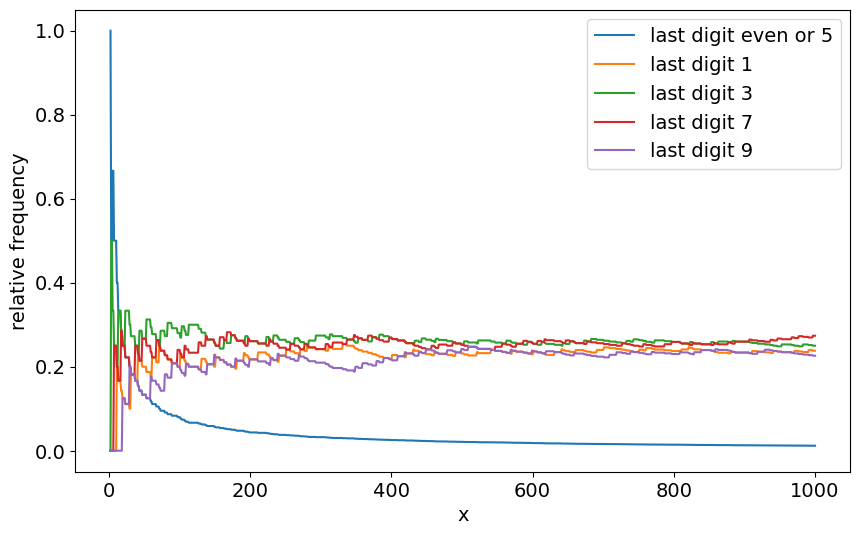

In [10]:
max_num = int(1000)

xs = np.arange(1, max_num+1)
curr_ps = get_prime_list(0, max_num)
curr_pis = pis(max_num)

last_digits_all = xs % 10
last_digits_primes = np.where(np.isin(xs, curr_ps), last_digits_all, np.zeros(max_num, dtype=int) - 1)

last_digit_cum_counts = {}
for i in range(10):
    last_digit_cum_counts[i] = np.cumsum(last_digits_primes == i)

plt.figure(figsize=(10, 6))
plt.plot(xs, (last_digit_cum_counts[0] + last_digit_cum_counts[2] + last_digit_cum_counts[4] + last_digit_cum_counts[6] + last_digit_cum_counts[8] + last_digit_cum_counts[5]) / curr_pis, label=f"last digit even or 5")
plt.plot(xs, last_digit_cum_counts[1] / curr_pis, label=f"last digit 1")
plt.plot(xs, last_digit_cum_counts[3] / curr_pis, label=f"last digit 3")
plt.plot(xs, last_digit_cum_counts[7] / curr_pis, label=f"last digit 7")
plt.plot(xs, last_digit_cum_counts[9] / curr_pis, label=f"last digit 9")
plt.xlabel("x")
plt.ylabel("relative frequency")
plt.legend()
plt.show()



/tmp/ipykernel_519689/4084684924.py:13: RuntimeWarning: invalid value encountered in remainder
  sum_digits_cum_counts[i] = np.cumsum(sum_digits_primes % i == 0)


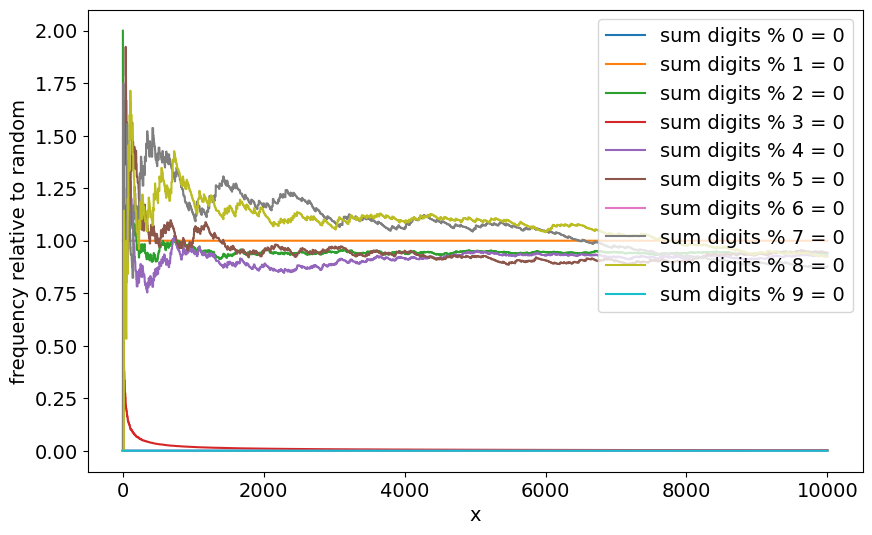

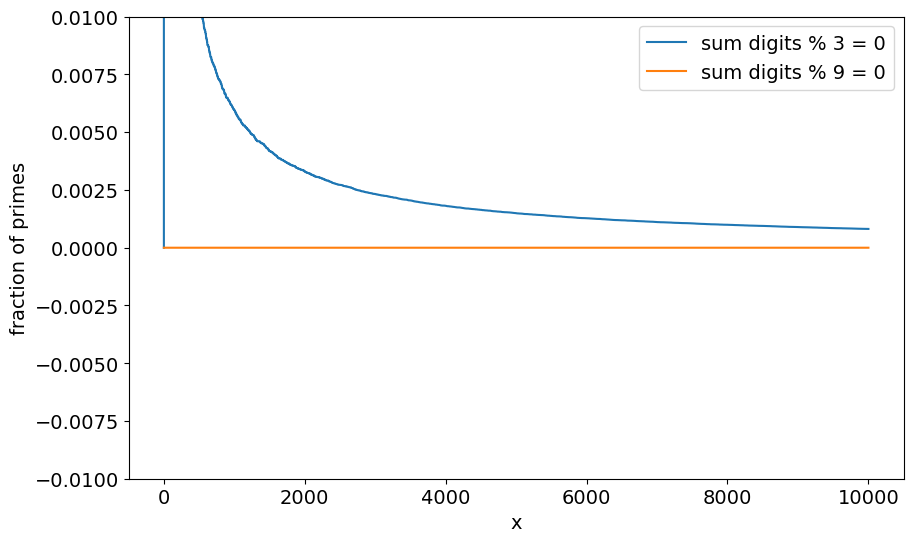

In [11]:
max_num = int(10000)

xs = np.arange(1, max_num+1)
curr_ps = get_prime_list(0, max_num)
curr_pis = pis(max_num)
safer_curr_pis = np.where(curr_pis == 0, np.nan, curr_pis)

sum_digits_all = [np.sum([int(d) for d in str(x)]) for x in xs]
sum_digits_primes = np.where(np.isin(xs, curr_ps), sum_digits_all, np.array([np.nan for _ in range(max_num)]))

sum_digits_cum_counts = {}
for i in range(10):
    sum_digits_cum_counts[i] = np.cumsum(sum_digits_primes % i == 0)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(xs, sum_digits_cum_counts[i] / safer_curr_pis * i, label=f"sum digits % {i} = 0")
plt.xlabel("x")
plt.ylabel("frequency relative to random")
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(xs, sum_digits_cum_counts[3] / safer_curr_pis, label=f"sum digits % 3 = 0")
plt.plot(xs, sum_digits_cum_counts[9] / safer_curr_pis, label=f"sum digits % 9 = 0")
plt.xlabel("x")
plt.ylabel("fraction of primes")
plt.legend(loc="upper right")
plt.ylim(-0.01, 0.01)
plt.show()


# Unused

In [13]:
test_speed = False
test_nth_prime = False

if test_speed:

    def get_prime_list_slow(min, max):
        primes = []
        for num in range(min, max + 1):
            if num > 1:
                for i in range(2, num):
                    if (num % i) == 0:
                        break
                else:
                    primes.append(num)
        return primes

    min, max = 0, int(5e4)
    print(len(get_prime_list(min, max))) # 0.0s
    print(len(get_prime_list_slow(min, max))) # 2.3s

if test_nth_prime:
    
    print("2e17-th prime:")
    print(f"real:          8512677386048191063")
    print("my bad approx:", nth_prime_approx_nlogn(int(2e17)))
    print("my approx:    ", nth_prime_approx_better(int(2e17)))
    print("wiki approx:   8512681315554715386")


In [14]:
make_lower_upper_limit_plots = False
if make_lower_upper_limit_plots:

    def nth_prime_approx_lower(n):
        val = n * (
                np.log(n)
            + np.log(np.log(n)) - 1
            )
        if np.isfinite(val) == False:
            return np.nan
        return int(val)

    def nth_prime_approx_upper(n):
        val = n * (
                np.log(n)
            + np.log(np.log(n))
            )
        if np.isfinite(val) == False:
            return np.nan
        return int(val)

    plt.rcParams.update({'font.size': 14})

    ns = np.arange(1, max_num+1)
    curr_nths = nth_prime_list(max_num)
    curr_nths_approx_nlogn = np.array([nth_prime_approx_nlogn(n) for n in ns])
    curr_nths_approx_better = np.array([nth_prime_approx_better(n) for n in ns])

    safer_curr_nths_approx_nlogn = np.where(curr_nths_approx_nlogn == 0, np.nan, curr_nths_approx_nlogn)
    safer_curr_nths_approx_better = np.where(curr_nths_approx_better == 0, np.nan, curr_nths_approx_better)

    curr_nths_approx_nlogn_ratio = curr_nths / safer_curr_nths_approx_nlogn
    curr_nths_approx_better_ratio = curr_nths / safer_curr_nths_approx_better

    curr_nths_approx_lower = np.array([nth_prime_approx_lower(n) for n in ns])
    curr_nths_approx_upper = np.array([nth_prime_approx_upper(n) for n in ns])

    curr_nths_approx_nlogn_err = (curr_nths - safer_curr_nths_approx_nlogn) / curr_nths
    curr_nths_approx_better_err = (curr_nths - safer_curr_nths_approx_better) / curr_nths
    curr_nths_approx_lower_err = (curr_nths - curr_nths_approx_lower) / curr_nths
    curr_nths_approx_upper_err = (curr_nths - curr_nths_approx_upper) / curr_nths

    plt.figure(figsize=(10, 6))
    plt.plot(curr_nths_approx_nlogn_err, label="(nth prime - n log(n)) / nth prime")
    plt.plot(curr_nths_approx_better_err, label="(nth prime - better approx) / nth prime")
    plt.fill_between(ns, curr_nths_approx_lower_err, curr_nths_approx_upper_err, alpha=0.5, color="tab:orange")
    plt.axhline(0, color="black", linestyle="--")
    plt.legend()
    plt.xlabel("x")
    #plt.xlim(0, max_num)
    plt.xscale("log")
    plt.ylim(-0.5, 0.5)
    plt.show()
